In [1]:
from __future__ import absolute_import, division, print_function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import time
import math
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#from sklearn import metrics.classification_report
#from sklearn import metrics.confusion_matrix

import keras
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D



Using TensorFlow backend.


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0) # Set default figure size
print("Tensorflow version", tf.__version__)

Tensorflow version 1.13.1


In [3]:
# Open the file as readonly
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

type(h5f)
for key in h5f.keys():
    print(key) #Names of the groups in HDF5 file.

h5py._hl.files.File

X_test
X_train
X_val
y_test
y_train
y_val


In [4]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


Text(0.5, 1.0, '2')

Text(0.5, 1.0, '6')

Text(0.5, 1.0, '7')

Text(0.5, 1.0, '4')

Text(0.5, 1.0, '4')

Text(0.5, 1.0, '0')

Text(0.5, 1.0, '3')

Text(0.5, 1.0, '0')

Text(0.5, 1.0, '7')

Text(0.5, 1.0, '3')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Label for each of the below images:  [2 6 7 4 4 0 3 0 7 3]


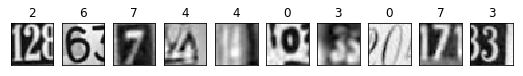

In [5]:
#Visualize few sample images
fig, axes = plt.subplots(1, 10,figsize=(9, 9), sharey=True, sharex=True)

for i in range(10):
    axes[i].imshow(X_train[i].reshape(32,32),cmap=plt.get_cmap('gray'))
    axes[i].set_title(y_train[i])
    
plt.xticks([])
plt.yticks([])

print('Label for each of the below images: ', y_train[0:10])

In [6]:
x_train = X_train.copy()
x_test = X_test.copy()

print(x_train.shape[0], y_train.shape[0], x_test.shape[0], y_test.shape[0])
print(x_train.shape[1:3], x_test.shape[1:3])
print(x_train[1].shape, x_test[3].shape)

x_train = x_train.reshape(x_train.shape[0], 32, 32, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1).astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape[1:3], x_test.shape[1:3])
print(x_train[1].shape, x_test[3].shape)
print(x_train.shape[0], y_train.shape[0], x_test.shape[0], y_test.shape[0])

42000 42000 18000 18000
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32) (32, 32)
(32, 32, 1) (32, 32, 1)
42000 42000 18000 18000


In [7]:
#Prepare flattened pixel array
ind=0
x_train_knn=[]
for i in x_train:
    x_train_knn.append(np.array(x_train[ind]).flatten())
    ind=ind+1
print(ind, x_train_knn[1].shape, type(x_train_knn))

ind=0
x_test_knn=[]
for i in x_test:
    x_test_knn.append(np.array(x_test[ind]).flatten())
    ind=ind+1
print(ind, x_test_knn[1].shape, type(x_test_knn))


42000 (1024,) <class 'list'>
18000 (1024,) <class 'list'>


In [8]:
##Use kfold cross validation to get no of neighbours

# creating odd list of K for KNN
myList = list(range(1,10))

# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train_knn, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

1
2
3
4
5
6
7
8
9


0.5513571428571429

0

The optimal number of neighbors is 1


In [9]:
##Use the best_k to get classification report
model1_knn = KNeighborsClassifier(n_neighbors= best_k , weights = 'distance' )

In [10]:
model1_knn.fit(x_train_knn, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [11]:
y_pred = model1_knn.predict(x_test_knn)

In [13]:
print("[INFO] Test accuracy: {:.2f}%".format(model1_knn.score(x_test_knn, y_test) * 100))

[INFO] Test accuracy: 45.92%


In [14]:
# Classification report 
print("Classification report for classifier %s:\n%s\n" % (model1_knn, metrics.classification_report(y_test, y_pred)))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance'):
              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1814
           1       0.50      0.57      0.53      1828
           2       0.54      0.48      0.51      1803
           3       0.37      0.35      0.36      1719
           4       0.60      0.57      0.59      1812
           5       0.38      0.33      0.36      1768
           6       0.38      0.39      0.39      1832
           7       0.63      0.59      0.61      1808
           8       0.34      0.37      0.36      1812
           9       0.39      0.40      0.40      1804

   micro avg       0.46      0.46      0.46     18000
   macro avg       0.46      0.46      0.46     18000
weighted avg       0.46      0.46      0.46     18000
 samples avg    

In [16]:
#Initialize variables
BATCH_SIZE = 30
EPOCHS = 10
PATIENCE = 3


In [21]:
## Without Batch Normalization - just to show its effects
# Define Model
model2_dnn = Sequential()

# 1st Conv Layer
model2_dnn.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 1)))
model2_dnn.add(Activation('relu'))

# 2nd Conv Layer
model2_dnn.add(Convolution2D(32, 3, 3))
model2_dnn.add(Activation('relu'))  

# Max Pooling
model2_dnn.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
model2_dnn.add(Dropout(0.25))

# Fully Connected Layer
model2_dnn.add(Flatten())
model2_dnn.add(Dense(128))
model2_dnn.add(Activation('relu'))
    
# More Dropout
model2_dnn.add(Dropout(0.5))

# Prediction Layer
model2_dnn.add(Dense(10))
model2_dnn.add(Activation('softmax'))

# Loss and Optimizer
model2_dnn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=PATIENCE, verbose=1, mode='auto')
cb_list = [early_stopping]

# Train the model
model2_dnn.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, validation_data=(x_test, y_test), callbacks=cb_list)

loss_and_metrics1 = model2_dnn.evaluate(x_test, y_test)
print(loss_and_metrics1)

# Classification report 
print("Classification report for classifier %s:\n%s\n" % (model2_dnn, metrics.classification_report(y_test, y_pred)))


/conda/envs/rapids/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 1...)`
  
/conda/envs/rapids/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/conda/envs/rapids/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 9s 215us/step - loss: 2.3020 - acc: 0.1090 - val_loss: 2.2982 - val_acc: 0.1492
Epoch 2/10
42000/42000 [==============================] - 9s 208us/step - loss: 2.2927 - acc: 0.1381 - val_loss: 2.2732 - val_acc: 0.2091
Epoch 3/10
42000/42000 [==============================] - 9s 209us/step - loss: 2.1681 - acc: 0.2437 - val_loss: 1.7681 - val_acc: 0.5770
Epoch 4/10
42000/42000 [==============================] - 9s 209us/step - loss: 1.4097 - acc: 0.5493 - val_loss: 0.8654 - val_acc: 0.7753
Epoch 5/10
42000/42000 [==============================] - 9s 208us/step - loss: 0.9854 - acc: 0.6960 - val_loss: 0.7013 - val_acc: 0.8132
Epoch 6/10
42000/42000 [==============================] - 9s 206us/step - loss: 0.8422 - acc: 0.7424 - val_loss: 0.6258 - val_acc: 0.8282
Epoch 7/10
42000/42000 [==============================] - 9s 209us/step - loss: 0.7685 - acc: 0.7647 - val_loss: 0.5575 - 

18000/18000 [==============================] - 1s 60us/step
[0.4923990302483241, 0.8626666666666667]


In [22]:
## With batch normalization. Final model.
# Define Model
model3_dnn = Sequential()

# 1st Conv Layer
model3_dnn.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 1)))
model3_dnn.add(BatchNormalization())
model3_dnn.add(Activation('relu'))

# 2nd Conv Layer
model3_dnn.add(Convolution2D(32, 3, 3))
model3_dnn.add(BatchNormalization())
model3_dnn.add(Activation('relu'))  

# Max Pooling
model3_dnn.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
model3_dnn.add(Dropout(0.25))

# Fully Connected Layer
model3_dnn.add(Flatten())
model3_dnn.add(Dense(128))
model3_dnn.add(Activation('relu'))
    
# More Dropout
model3_dnn.add(Dropout(0.5))

# Prediction Layer
model3_dnn.add(Dense(10))
model3_dnn.add(Activation('softmax'))

# Loss and Optimizer
model3_dnn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    

/conda/envs/rapids/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 1...)`
  
/conda/envs/rapids/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()


In [23]:
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=PATIENCE, verbose=1, mode='auto')
cb_list = [early_stopping]

# Train the model
model3_dnn.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, validation_data=(x_test, y_test), callbacks=cb_list)

/conda/envs/rapids/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 11s 272us/step - loss: 1.7861 - acc: 0.3551 - val_loss: 1.0366 - val_acc: 0.6992
Epoch 2/10
42000/42000 [==============================] - 11s 258us/step - loss: 0.9192 - acc: 0.7038 - val_loss: 0.6606 - val_acc: 0.8057
Epoch 3/10
42000/42000 [==============================] - 11s 260us/step - loss: 0.7199 - acc: 0.7730 - val_loss: 0.6925 - val_acc: 0.7987
Epoch 4/10
42000/42000 [==============================] - 11s 258us/step - loss: 0.6481 - acc: 0.7962 - val_loss: 0.5322 - val_acc: 0.8442
Epoch 5/10
42000/42000 [==============================] - 11s 258us/step - loss: 0.5954 - acc: 0.8103 - val_loss: 0.5938 - val_acc: 0.8369
Epoch 6/10
42000/42000 [==============================] - 11s 259us/step - loss: 0.5602 - acc: 0.8232 - val_loss: 0.4432 - val_acc: 0.8689
Epoch 7/10
42000/42000 [==============================] - 11s 258us/step - loss: 0.5302 - acc: 0.8313 - val_loss: 0.

In [20]:
loss_and_metrics1 = model3_dnn.evaluate(x_test, y_test)
print(loss_and_metrics1)


18000/18000 [==============================] - 1s 79us/step
[0.42544503529866534, 0.8740555555555556]


In [27]:
from sklearn.metrics import classification_report
y_pred_dnn=model3_dnn.predict(x_test, batch_size=200, verbose=2)
report = classification_report(y_test, y_pred_dnn.round())
print(report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1814
           1       0.91      0.89      0.90      1828
           2       0.97      0.84      0.90      1803
           3       0.94      0.78      0.85      1719
           4       0.96      0.87      0.91      1812
           5       0.93      0.84      0.88      1768
           6       0.95      0.79      0.86      1832
           7       0.95      0.88      0.91      1808
           8       0.95      0.77      0.85      1812
           9       0.93      0.80      0.86      1804

   micro avg       0.94      0.84      0.88     18000
   macro avg       0.94      0.84      0.88     18000
weighted avg       0.94      0.84      0.88     18000
 samples avg       0.84      0.84      0.84     18000



/conda/envs/rapids/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [ ]:

##Comparison of CNN with and without batch normalization
#1. Batch normalization has reduced overfitting effect as difference between training acc and
#validation acc came down. 
#2. Batch normalization provided only a small marginal increase in performance. (0.826 vs 0.874)

##Comparison of final CNN with KNN model.
#1. The Acurracy is high for CNN as expected. CNN extracts features through convolution layer 
#whereas KNN processes the raw pixel data
#2. Memory requirement is high for KNN as expected. When kfold cross validation was run from laptop it 
#ran out of memory. Rerun the code from desktop system to complete it. 
#3. Training time was also high for KNN as expected. It took hours to complete kfold
#cross validation. 